### Monte Carlo Playground
Playing around with some Monte Carlo Simulations, eventually the goal is to replicate some examples and logic from Taleb, N.N., 2020. The Statistical Consequences of Fat Tails.

In [3]:
import pandas as pd
import numpy as np
import random
import datetime as dt
from scipy.stats import sem, t

import matplotlib.pyplot as plt

# Pretty Display of Variables
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

# Double resolution plotting for retina display
%config InlineBackend.figure_format ='retina'

%matplotlib inline

##### Read in S&P500 data

In [2]:
sp500 = pd.read_csv("data/sp500_daily_train_data.csv")
sp500.head(1)

,loctimestamp,target_ret,ret,ret_risk,r_f,svix,qskew,qkurt,market,market_risk,size,size_risk,value,value_risk,momentum,momentum_risk
0,2004-01-05,0.001599,0.012253,0.000028,0.0097,0.028482,-2.420643,23.880412,0.011929,0.000343,0.004191,0.000367,0.0001,0.00006,0.005485,0.000084


### SP500 return simulation with price evolution

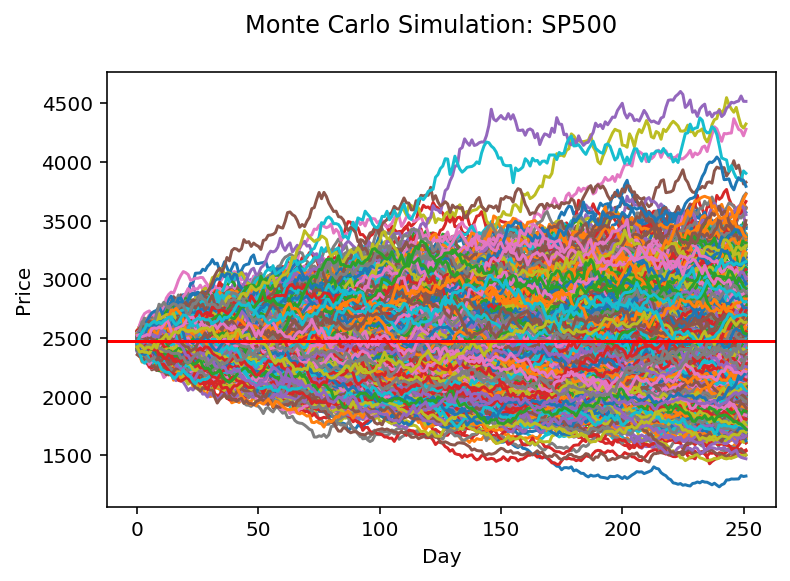

In [4]:
start = sp500['loctimestamp'][0]
end = sp500['loctimestamp'][-1:]

returns = sp500['ret']

last_price = 2472.54

#Number of Simulations
num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
    
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: SP500')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

##### ToDo
- Binomial Distribution
- Other Distributions
- Fat tailed Distributions
- Calculate Max Drawdowns and VaR

##### Coin Flip

Final value : 0.5014


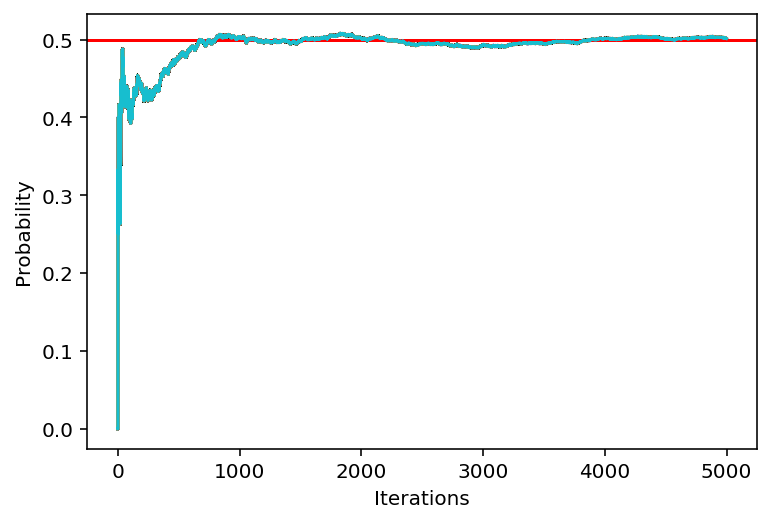

In [6]:
# from https://colab.research.google.com/drive/1ZniHyaE7AqkNYpypw8Qn7dGv62MlSrGG?usp=sharing#scrollTo=VrB1-X_zclHT
# 1. Coin Flip Example
#Coin flip function :

#0 --> Heads
#1 --> Tails

def coin_flip():
    return random.randint(0,1) 

#Monte Carlo Simulation :

#Empty list to store the probability values.
list1 = []

def monte_carlo(n):
    results = 0
    for i in range(n):
        flip_result = coin_flip()
        results = results + flip_result
        
        #Calculating probability value :
        prob_value = results/(i+1)
        
        #Append the probability values to the list :
        list1.append(prob_value)

        #Plot the results :
        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("Iterations")
        plt.ylabel("Probability")
        plt.plot(list1)
       
    return results/n
  
#Calling the function :

answer = monte_carlo(5000)
print("Final value :",answer)

### Gamblers Ruin

Sunday probability puzzle form Michael Harris: https://twitter.com/mikeharrisNY/status/1315426197413621760

Three fair coins tossed. Heads gets +1, tails -1, pay-offs are added and net pay-off added to equity. The 3 tosses are repeated 1000 times. Initial equity is 10$\$$. What is the probability of total ruin (within +/- 0.05 error)?

Help from: https://github.com/claudian37/Gamblers_Ruin_Webapp/blob/master/gamblers_ruin.py
Theoretical stuff: http://www.columbia.edu/~ks20/stochastic-I/stochastic-I-GRP.pdf

In [4]:
from GamblersRuin import GamblersRuin

Text(0.5, 1.0, 'Distribution one round with n = 100000')

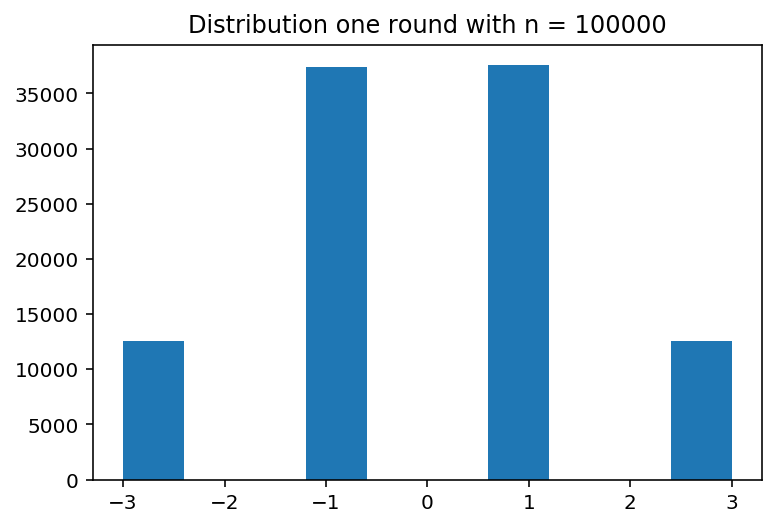

In [175]:
# probability of success
p = 0.5
# initial amount
init_bal = 10
# number of rounds
no_rounds = 1000
# number of simulations
no_simulations = 100

play_one_round_list = []

for no_simulations in range(1, 100000+1):
    gr = GamblersRuin(p=float(p), init_bal=int(init_bal))
    res = gr.play_one_round()
    play_one_round_list.append(res)
    
plt.hist(play_one_round_list)
plt.title(f'Distribution one round with n = {no_simulations}')

In [176]:
np.var(play_one_round_list)

3.00847984

In [103]:
gr = GamblersRuin(p=float(p), init_bal=int(init_bal))
# simulate no_simulations number of gains
gr.simulate(no_simulations=no_simulations, no_rounds=no_rounds)
# find out number of ruins, with length < 100
no_ruins = sum(len(list_elem) < no_rounds for list_elem in gr.simulation_results)
# find out number of non-ruins
no_non_ruins = sum(len(list_elem) == no_rounds for list_elem in gr.simulation_results)

# calculate probability of ruin 
prob_ruin = no_ruins / (no_ruins + no_non_ruins)
print(f"Probability of ruin for n = {len(gr.simulation_results)}: {prob_ruin * 100}%")

Probability of ruin for n = 1000: 85.6%


##### Plot balance evolution

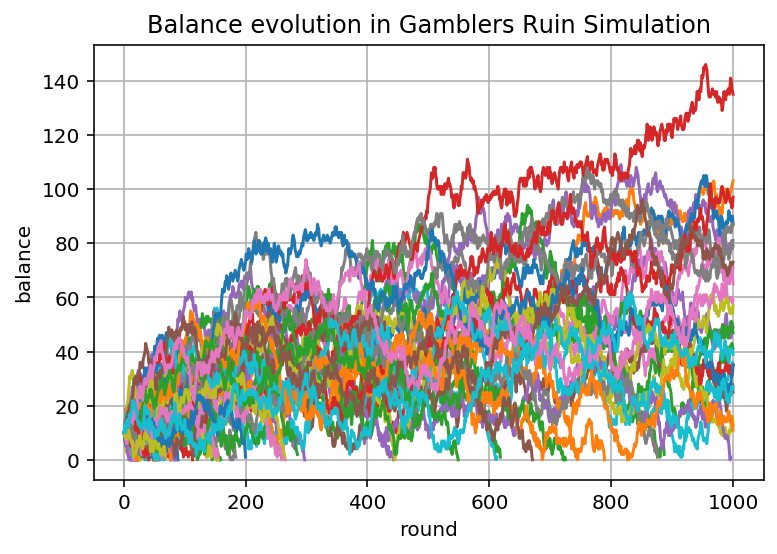

In [49]:
fig, ax = plt.subplots()

for list_elem in gr.simulation_results:
    x = range(1, len(list_elem) + 1)
    y = list_elem
    ax.plot(x, y)

ax.set(xlabel='round', ylabel='balance',
       title='Balance evolution in Gamblers Ruin Simulation')
ax.grid()

plt.show()

##### Additional layer of simulation for increasing no_simulations

In [108]:
# probability of success
p = 0.5
# initial amount
init_bal = 10
# number of rounds
no_rounds = 1000

prob_ruin_list = []

for no_simulations in range(1000, 10000, 2000):
    gr = GamblersRuin(p=float(p), init_bal=int(init_bal))
    # simulate no_simulations number of gains
    gr.simulate(no_simulations=no_simulations, no_rounds=no_rounds)
    
    # find out number of ruins, with length < 100
    no_ruins = sum(len(list_elem) < no_rounds for list_elem in gr.simulation_results)
    # find out number of non-ruins
    no_non_ruins = sum(len(list_elem) == no_rounds for list_elem in gr.simulation_results)

    # calculate probability of ruin 
    prob_ruin = no_ruins / (no_ruins + no_non_ruins)
    print(f"Probability of ruin for n = {len(gr.simulation_results)}: {prob_ruin * 100}%")
    
    prob_ruin_list.append(prob_ruin)

Probability of ruin for n = 1000: 82.5%
Probability of ruin for n = 3000: 83.66666666666667%
Probability of ruin for n = 5000: 82.82000000000001%
Probability of ruin for n = 7000: 83.52857142857142%
Probability of ruin for n = 9000: 82.89999999999999%


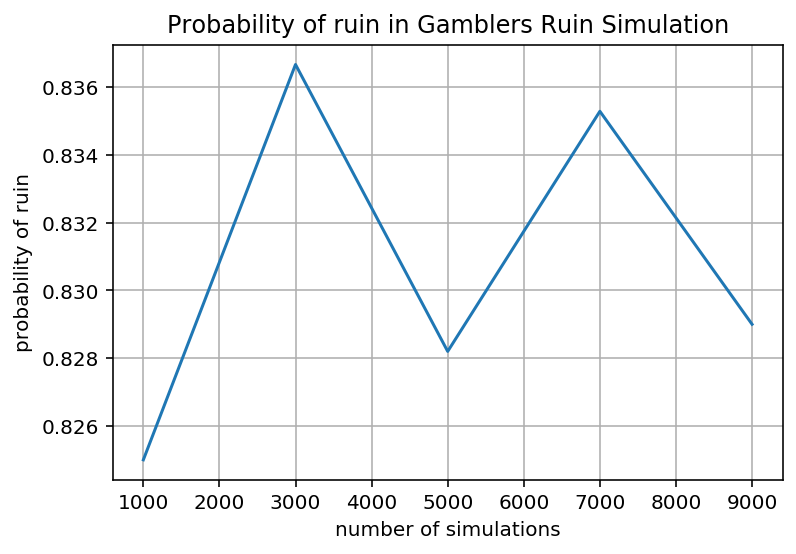

In [110]:
# Data for plotting
x = range(1000, 10000, 2000)
y = prob_ruin_list

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='number of simulations', ylabel='probability of ruin',
       title='Probability of ruin in Gamblers Ruin Simulation')
ax.grid()

plt.show()

##### I get aroun d 85 percent instead of 100%, here is why:

This result is consistent with flipping three coins independently at each trial step. 

If you treat this as a binomial RV with n=3 at each step you’ll see the result Mike is expecting. 

Flipping a coin in succession is different from flipping three concurrently from markov lens

- Change simulation
- Build binomial pdf and read quantil where payout = -10 with n = 1000 and p = 0.5